In [ ]:
import requests
from bs4 import BeautifulSoup

from collections import defaultdict
import pandas as pd
import numpy as np
import csv
import re
from fuzzywuzzy import fuzz

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Use WB API to get a list of available projects

World Bank Projects & Operations provides access to basic information on all of the World Bank's lending projects from 1947 to the present. The dataset includes basic information such as the project title, task manager, country, project id, sector, themes, commitment amount, product line, and financing. It also provides links to publicly disclosed online documents.

url: http://search.worldbank.org/api/v2/projects

Note1: There are about 17K different projects and the code takes some time to execute

Note2: projects - is a list of dictionaries, since each project may come with different fields

In [ ]:
#Use WB API to obtain a list of WB Projects
url_base = 'http://search.worldbank.org/api/v2/projects?format=xml&fct=docty_exact,regionname_exact,countryname_exact,lendinginstr_exact,borrower_exact,supplementprojectflg_exact,impagency_exact,status_exact,mjsector_exact,sector_exact,goal_exact,theme_exact,boardapprovaldate_exact,countryshortname_exact,mjsectorcode_exact,board_approval_year_exact,fiscalyear,projectfinancialtype_exact,lang_exact,mjtheme_exact,sector_namecode_exact,mjsector_namecode_exact,theme_namecode_exact,mjtheme_namecode_exact,country_namecode_exact,countryname_mdk_exact,goalname_mdk_exact,lendinginstr_mdk_exact,lendinginstrtype_mdk_exact,mjsectorname_mdk_exact,sectorname_mdk_exact,themename_mdk_exact,mjthemename_mdk_exact,mtthemename_mdk_exact,project_name_mdk_exact,prodlinetext_mdk_exact,envassesmentcategorycode,combined_practice_code,combined_practice_name,ccsa_practice_code_exact,ccsa_practice_name_exact,teamleadname_exact,prodline_exact&source=IBRD&rows=500&os='

projects = []

for i in range(1,18000,500):
    print(i)
    url = url_base + str(i) + '&kw=N'
    response = requests.get(url)
    page = response.text
    soup = BeautifulSoup(page,'lxml')
    
    for project in soup.find_all('project'):
        rec = defaultdict(list)
        for tag in project.children:
            if tag!= '\n':
                rec[tag.name] = str(tag.text)
        projects.append(rec)


#### Create a list of all possible fields for projects

In [5]:
keyes = []

for p in projects:
    for k in p.keys():
        keyes.append(k)

columns = set(keyes)

#### Create a list of dictionaries with same/uniform fields across all projects

In [6]:
table = defaultdict(list)

for project in projects:
    for c in columns:
        if c in project.keys():
            table[c] += [project[c]]
        else:
            table[c] += [None]
        

#### Create a dataframe for projects avaialble

In [7]:
df = pd.DataFrame(table)
df.to_csv('Projects_08_2016.csv')

In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 54 columns):
agencyinfo                  79 non-null object
approvalfy                  15861 non-null object
board_approval_month        15861 non-null object
boardapprovaldate           15861 non-null object
borrower                    12116 non-null object
ccsa_practice_code          3320 non-null object
ccsa_practice_name          3320 non-null object
closingdate                 14187 non-null object
combined_practice_code      3320 non-null object
combined_practice_name      3320 non-null object
country_namecode            17125 non-null object
countrycode                 17125 non-null object
countryname                 17125 non-null object
countryshortname            17125 non-null object
docty                       15099 non-null object
envassesmentcategorycode    11687 non-null object
grantamt                    17125 non-null object
ibrdcommamt                 17125 non-null objec

#### Run simple statistics for projects available

In [446]:
#plt.hist(df.approvalfy.astype(int))
df.status.value_counts()

Closed      13288
Active       2625
Dropped       832
Pipeline      380
Name: status, dtype: int64

In [356]:
df.countrynam.value_counts()

Republic of India                           745
Republic of Indonesia                       552
People's Republic of China                  545
Federative Republic of Brazil               510
Islamic Republic of Pakistan                384
People's Republic of Bangladesh             350
United Mexican States                       313
Republic of the Philippines                 301
Republic of Colombia                        268
United Republic of Tanzania                 260
Africa                                      257
Republic of Kenya                           250
Socialist Republic of Vietnam               246
Republic of Ghana                           230
Republic of Turkey                          224
Kingdom of Morocco                          223
Federal Republic of Nigeria                 220
Republic of Yemen                           217
Argentine Republic                          216
Republic of Uganda                          211
Federal Democratic Republic of Ethiopia 

(array([  176.,   340.,   753.,  1325.,  1496.,  1679.,  1776.,  2024.,
         3091.,  3076.]),
 array([ 1955. ,  1961.2,  1967.4,  1973.6,  1979.8,  1986. ,  1992.2,
         1998.4,  2004.6,  2010.8,  2017. ]),
 <a list of 10 Patch objects>)

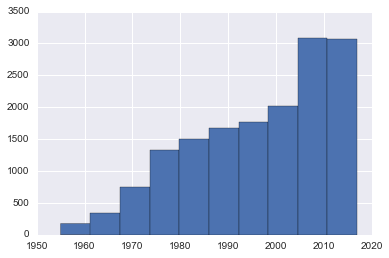

In [359]:
plt.hist(df.approvalfy.dropna().astype(int))

In [382]:
df.projectfinancialtype.value_counts()

IDA      6891
IBRD     6761
OTHER    3062
Name: projectfinancialtype, dtype: int64